# Final Project: Analysis Plan

## 1. Updated Project Question

### My original idea was to compare how different types of posts (images, videos, carousels) affect engagement on Instagram. The dataset I am using does not include the media type for each post, but it does include detailed information about impressions, likes, comments, saves, shares, profile visits, follows, and where impressions came from (home, hashtags, explore, other), as well as captions and hashtags.

## For this project, I will focus on the question:

### **How do different engagement and discovery factors (such as saves, shares, hashtags, and impression sources) relate to overall engagement and follows for Instagram posts from this account?**


## 2. Recap of Data

The dataset includes 119 Instagram posts. For each post, I have numeric metrics such as impressions, likes, comments, saves, shares, profile visits, and follows, along with how many impressions came from the home feed, hashtags, explore page, and other sources. I also have text data for the caption and a list of hashtags used in each post. There are no missing values in this dataset, so it is ready for analysis.


## 3. Research Questions & Hypotheses

**RQ1:** How is total engagement (likes + comments + saves + shares) related to the number of impressions a post receives?  
- *Hypothesis:* Posts with more impressions will tend to have higher engagement, but the relationship may not be perfectly proportional.

**RQ2:** Do posts that get more of their impressions from hashtags or Explore have higher engagement than posts mostly seen on the home feed?  
- *Hypothesis:* Posts discovered more through hashtags and the Explore page will have higher engagement, because they are reaching new audiences.

**RQ3:** Do posts with more hashtags get more impressions and higher engagement?  
- *Hypothesis:* Posts that use more hashtags will have higher impressions and engagement on average.


## 4. Planned Variables & New Features

To answer my questions, I will create a few new variables:

- **Engagement**: a new numeric variable defined as  
  `Engagement = Likes + Comments + Saves + Shares`.  
  This combines different ways users interact with a post into one measure.

- **Hashtag Count**: the number of hashtags used in each post, based on the `Hashtags` column.  
  This will let me test whether using more hashtags is associated with higher impressions or engagement.

- **Hashtag Impressions Share** (optional): `From Hashtags / Impressions`, which measures the proportion of impressions that came from hashtags.

- **Explore Impressions Share** (optional): `From Explore / Impressions`, which measures the proportion of impressions that came from the Explore page.

These new variables will help me compare posts and look for relationships between discovery, hashtags, and engagement.


## 5. Planned Analyses (What I Will Do and Why)

To answer my research questions, I plan to use the following analyses:

1. **Descriptive Statistics** for key variables  
   - I will compute summary statistics (mean, median, min, max) for Impressions, Engagement, Hashtag Count, Profile Visits, and Follows.  
   - *Why:* This helps me understand the typical performance of posts and how much variation there is.

2. **Scatterplots and Correlations**  
   - I will make scatterplots and calculate correlations between:
     - Impressions and Engagement
     - Hashtag Count and Impressions
     - Hashtag Count and Engagement
     - Engagement and Follows
   - *Why:* These plots and correlations will show whether there are positive relationships between these variables and how strong they are.

3. **Analysis of Impression Sources**  
   - I will look at how the shares of impressions from Home, Hashtags, and Explore relate to Engagement and Follows. For example, I will examine whether posts with a higher hashtag or explore share tend to have higher engagement.  
   - *Why:* This helps test whether discovery through hashtags and Explore is associated with better performance.

4. **(Optional) Simple Regression Models**  
   - If time allows, I will run simple linear regressions, such as:
     - Engagement ~ Impressions + Hashtag Count + Hashtag Impressions Share
   - *Why:* This would let me see how multiple factors together predict engagement, while controlling for others.

For the Analysis Plan checkpoint, I will implement the descriptive statistics, at least one scatterplot, and a correlation matrix as starting attempts at the analysis.


In [1]:
import pandas as pd

df = pd.read_csv("Instagram_data.csv", encoding="latin1")
df.head()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
# Create an Engagement column
df['Engagement'] = df['Likes'] + df['Comments'] + df['Saves'] + df['Shares']

# Create Hashtag Count by counting words that start with '#'
def count_hashtags(tag_string):
    if pd.isna(tag_string):
        return 0
    return sum(1 for token in str(tag_string).split() if token.startswith('#'))

df['Hashtag_Count'] = df['Hashtags'].apply(count_hashtags)

df['Hashtag_Share'] = df['From Hashtags'] / df['Impressions']
df['Explore_Share'] = df['From Explore'] / df['Impressions']

df[['Impressions', 'Engagement', 'Hashtag_Count', 'Hashtag_Share', 'Explore_Share']].head()


,Impressions,Engagement,Hashtag_Count,Hashtag_Share,Explore_Share
0,3920,274,22,0.262245,0.157908
1,5394,439,18,0.340749,0.217649
2,4021,184,18,0.295449,0.000000
3,4528,402,11,0.137147,0.205830
4,2518,228,29,0.101271,0.110802


In [4]:
df[['Impressions', 'Engagement', 'Hashtag_Count', 'Profile Visits', 'Follows']].describe()


,Impressions,Engagement,Hashtag_Count,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,343.117647,18.957983,50.621849,20.756303
std,4843.780105,238.849012,4.861462,87.088402,40.921580
min,1941.000000,104.000000,10.000000,4.000000,0.000000
25%,3467.000000,202.500000,17.000000,15.000000,4.000000
50%,4289.000000,288.000000,18.000000,23.000000,8.000000
75%,6138.000000,379.500000,21.000000,42.000000,18.000000
max,36919.000000,1721.000000,30.000000,611.000000,260.000000


In [5]:
df[['Impressions', 'Engagement', 'Hashtag_Count', 'Hashtag_Share', 'Explore_Share', 'Follows']].corr()


,Impressions,Engagement,Hashtag_Count,Hashtag_Share,Explore_Share,Follows
Impressions,1.000000,0.829472,-0.307231,0.087413,0.588228,0.889363
Engagement,0.829472,1.000000,-0.313601,0.015260,0.545048,0.688642
Hashtag_Count,-0.307231,-0.313601,1.000000,-0.229323,-0.234253,-0.300161
Hashtag_Share,0.087413,0.015260,-0.229323,1.000000,-0.365744,0.039864
Explore_Share,0.588228,0.545048,-0.234253,-0.365744,1.000000,0.559885
Follows,0.889363,0.688642,-0.300161,0.039864,0.559885,1.000000


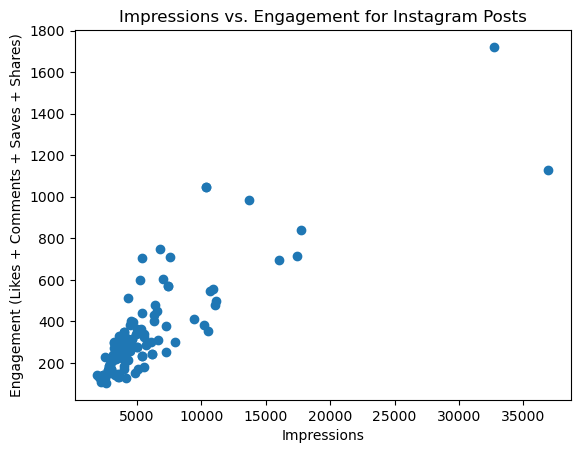

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df['Impressions'], df['Engagement'])
plt.xlabel('Impressions')
plt.ylabel('Engagement (Likes + Comments + Saves + Shares)')
plt.title('Impressions vs. Engagement for Instagram Posts')
plt.show()


## 7. Next Steps

Next, I plan to create additional visualizations (such as scatterplots for Hashtag Count and Explore/Hashtag impression shares) and look more closely at which posts have especially high or low engagement. I will also interpret the correlation results in more detail and decide whether running simple regression models will add useful insights. Finally, I will start drafting my final report structure in the notebook by planning where to include each figure and table.
